In [13]:
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pandas as pd
import pickle
import sklearn
import numpy as np
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from scipy import stats
import matplotlib.pyplot as plt
import warnings
import copy
warnings.filterwarnings('ignore')

In [29]:
def SVR_ML(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True,random_state=42)
    svr = SVR(kernel='linear', C=10.0, epsilon=0.7)
    svr.fit(X_train, y_train) 
    predictions = svr.predict(X_test)
    scores = cross_val_score(svr,X_train, y_train, cv=5)
    print("Scores SVR:")
    print(scores)
    plt.scatter(y_test, predictions)
    plt.xlabel("True Values")
    plt.ylabel("Predictions")
    return svr, scores

In [31]:
def Regression(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True,random_state=42)
    reg = LinearRegression().fit(X_train, y_train)
    reg.score(X_test, y_test)
    predictions = reg.predict(X_test)
    scores = cross_val_score(reg,X_train, y_train, cv=5)
    print("Scores Regression Linéaire:")
    print(scores)
    plt.scatter(y_test, predictions)
    plt.xlabel("True Values")
    plt.ylabel("Predictions")
    return reg, scores

In [4]:
X_15min = pickle.load(open( "X_learning15_min.p", "rb"))
X_hour = pickle.load(open( "X_learninghour.p", "rb"))
X_6_hour = pickle.load(open( "X_learning6_hour.p", "rb"))
X_day = pickle.load(open( "X_learningday.p", "rb"))
X_week = pickle.load(open( "X_learningweek.p", "rb"))

In [6]:
y_15min = pickle.load(open( "y_learning15_min.p", "rb"))
y_hour = pickle.load(open( "y_learninghour.p", "rb"))
y_6_hour = pickle.load(open( "y_learning6_hour.p", "rb"))
y_day = pickle.load(open( "y_learningday.p", "rb"))
y_week = pickle.load(open( "y_learningweek.p", "rb"))

Scores Regression Linéaire:
[0.99996565 0.99996749 0.99996371 0.99996415 0.99996579]
Scores SVR:
[0.99954313 0.99954138 0.99958516 0.9996244  0.99954583]


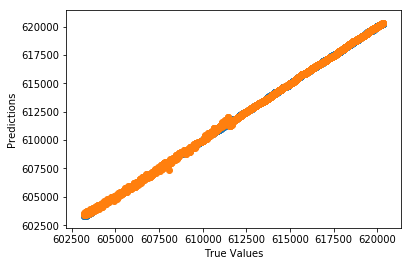

In [33]:
reg_15min,reg_scores_15min = Regression(X_15min,y_15min)
svr_15min,svr_scores_15min = SVR_ML(X_15min,y_15min)

Scores Regression Linéaire:
[0.99998256 0.99998258 0.99998502 0.99998484 0.99998495]
Scores SVR:
[0.99583165 0.99673279 0.99684485 0.99629645 0.99693587]


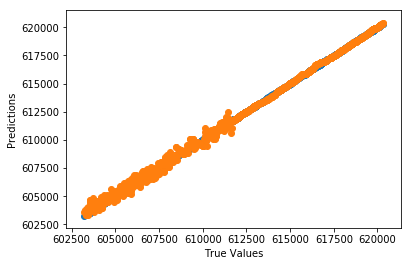

In [34]:
reg_hour,reg_scores_hour = Regression(X_hour,y_hour)
svr_hour,svr_scores_hour = SVR_ML(X_hour,y_hour)

Scores Regression Linéaire:
[0.99998062 0.99997936 0.99998121 0.99998734 0.99997966]
Scores SVR:
[0.94367432 0.93651217 0.97626453 0.94175586 0.93612932]


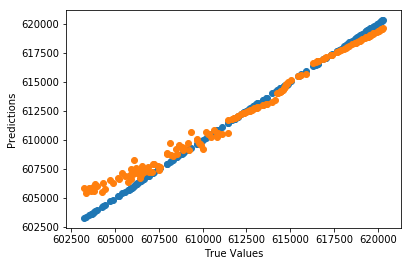

In [35]:
reg_6_hour,reg_scores_6_hour = Regression(X_6_hour,y_6_hour)
svr_6_hour,svr_scores_6_hour = SVR_ML(X_6_hour,y_6_hour)

Scores Regression Linéaire:
[0.99994694 0.99994441 0.99994433 0.99993915 0.99995521]
Scores SVR:
[0.5023184  0.58048852 0.51553613 0.65128256 0.53908299]


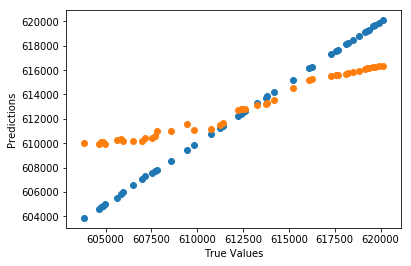

In [36]:
reg_day,reg_scores_day = Regression(X_day,y_day)
svr_day,svr_scores_day = SVR_ML(X_day,y_day)

Scores Regression Linéaire:
[0.99897228 0.99874829 0.99572513 0.96882303 0.9634243 ]
Scores SVR:
[ 0.12170059  0.11813773  0.108843   -0.14154252  0.17217944]


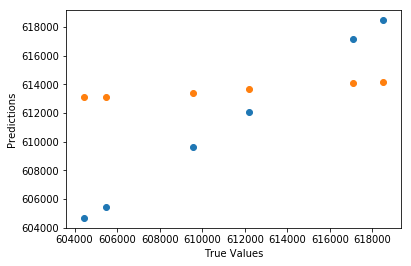

In [37]:
reg_week,reg_scores_week = Regression(X_week,y_week)
svr_week,svr_scores_week = SVR_ML(X_week,y_week)